In [ ]:
# This is to explore Hypothesis 1 Overall Ratings or overall sat

In [ ]:
# Notes this is a list of the main hypothesis along with options to explore 
# that the group has initially come up with

# Certain aspects of listing influence overall rating. What are they? - Jennifer
    # Choose 3-4 factors, plot each against overall rating, see what most closely correlates 
    # Number of listings per host - any correlation to ratings?  Do ratings go down the more listings same host has? - Sonja
    # Price as relates to rating - Brandon and Meredith
    # Cleaning fee as relates to rating, % of total rate
    # What is the average rating?
    # Listed features - ran out of time
    # Availability 90-60 days

In [1]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# this is to grab the data that we created on 01/03/2023 as a group

df = pd.read_csv('../BM_files/all_listings_df')
df.head()
df.tail()

,id,last_scraped,description,neighborhood_overview,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,city
22846,979474665987354279,2023-09-17,Discover the very best of Portland from the co...,NaN,353152177,2020-07-02,United States,within an hour,100%,99%,...,NaN,NaN,NaN,NaN,NaN,NaN,t,1,NaN,Portland
22847,980422903985425172,2023-09-17,Step into the comfort of this op floor stylish...,The Pearl District is arguably one of Portland...,456054754,2022-04-25,"Portland, OR",within an hour,100%,100%,...,NaN,NaN,NaN,NaN,NaN,NaN,t,1,NaN,Portland
22848,980439098128842446,2023-09-17,*Monthly Rental* Welcome to this beautifully d...,NaN,4618284,2013-01-07,"Portland, OR",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,t,1,NaN,Portland
22849,980549321160587970,2023-09-17,This house was taken down to the studs and put...,NaN,74481791,2016-05-28,"Portland, OR",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,f,1,NaN,Portland
22850,980724230458451699,2023-09-17,Located in the Mississippi and Alberta Arts Di...,Mississippi and Alberta Arts District,151457231,2017-09-20,"Portland, OR",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,t,1,NaN,Portland


In [3]:
# just looking at the different types of data that was included in the file
df.dtypes

id                                  int64
last_scraped                       object
description                        object
neighborhood_overview              object
host_id                             int64
host_since                         object
host_location                      object
host_response_time                 object
host_response_rate                 object
host_acceptance_rate               object
host_is_superhost                  object
host_listings_count                 int64
host_total_listings_count           int64
host_has_profile_pic               object
host_identity_verified             object
neighbourhood_cleansed             object
latitude                          float64
longitude                         float64
property_type                      object
room_type                          object
accommodates                        int64
bathrooms                         float64
bathrooms_text                     object
bedrooms                          

In [4]:
# cleaning I think that the availability columns should be percents


df.loc[:, 'avail_30_percent'] = round((df['availability_30'] / 30 *100), 1)
df.loc[:, 'avail_60_percent'] = round((df['availability_60'] / 60 *100), 1)
df.loc[:, 'avail_90_percent'] = round((df['availability_90'] / 90 *100), 1)
df.loc[:, 'avail_365_percent'] = round((df['availability_365'] / 365 *100), 1)


df.head()

,id,last_scraped,description,neighborhood_overview,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,...,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,city,avail_30_percent,avail_60_percent,avail_90_percent,avail_365_percent
0,360,2023-09-24,Enjoy the famous Colorado weather and unplug i...,The cottage is located in the center of Lower ...,666,2008-07-08,"Denver, CO",within an hour,100%,97%,...,5.00,4.91,f,2,2.87,Denver,13.3,45.0,63.3,40.3
1,364,2023-09-24,"Modern 1,000 square foot loft in the heart of ...","Ten brewpubs within walking distance, two grea...",783,2008-07-11,"Denver, CO",NaN,NaN,NaN,...,4.65,4.71,f,1,0.50,Denver,76.7,88.3,92.2,98.1
2,590,2023-09-24,"Large guest room in my home, where I also live...",I love the diversity of my neighborhood and it...,933,2008-07-21,"Denver, CO",within an hour,100%,95%,...,4.76,4.85,f,2,4.04,Denver,16.7,45.0,58.9,63.8
3,592,2023-09-24,This room is in the basement. It does not hav...,NaN,933,2008-07-21,"Denver, CO",within an hour,100%,95%,...,4.81,4.86,f,2,0.95,Denver,0.0,0.0,0.0,43.3
4,686,2023-09-24,Thanks for visiting my Queen Bed Room site for...,"I love my Uptown neighborhood, which is within...",990,2008-07-23,"Denver, CO",within a few hours,100%,100%,...,4.87,4.81,f,2,1.39,Denver,0.0,0.0,14.4,78.9


In [5]:
# converting availability and bookable to int type data this basicaly maps t to 1 
# and f to 0 the next line is me practicing replacing 
df['has_availability_recode'] = df['has_availability'].map({'t': 1, 'f': 0})
df['instant_bookable_recode'] = df['instant_bookable'].map({'t': 1, 'f': 0})

# If you want 1 for True and 2 for False
df['has_availability_recode'] = df['has_availability'].replace({'t': 1, 'f': 2})
df['instant_bookable_recode'] = df['instant_bookable'].replace({'t': 1, 'f': 2})

# Calculate percentage distribution
percentage_availibility = df['has_availability_recode'].value_counts(normalize=True) * 100
percentage_bookable = df['instant_bookable_recode'].value_counts(normalize=True) * 100

# Convert to float
df['has_availability_recode'] = df['has_availability_recode'].astype(float)
df['instant_bookable_recode'] = df['instant_bookable_recode'].astype(float)

print(percentage_availibility, percentage_bookable)



has_availability_recode
1    98.328301
2     1.671699
Name: proportion, dtype: float64 instant_bookable_recode
2    66.334077
1    33.665923
Name: proportion, dtype: float64


In [8]:
# Sticking the overall rating on a five point scale too 
df.loc[:, 'overall_rating_percent'] = round((df['review_scores_rating'] / 5 *100), 1)
df.loc[:, 'accuracy_rating_percent'] = round((df['review_scores_accuracy'] / 5 *100), 1)
df.loc[:, 'cleanliness_rating_percent'] = round((df['review_scores_cleanliness'] / 5 *100), 1)
df.loc[:, 'checkin_rating_percent'] = round((df['review_scores_checkin'] / 5 *100), 1)
df.loc[:, 'communication_rating_percent'] = round((df['review_scores_communication'] / 5 *100), 1)
df.loc[:, 'location_rating_percent'] = round((df['review_scores_location'] / 5 *100), 1)
df.loc[:, 'value_rating_percent'] = round((df['review_scores_value'] / 5 *100), 1)

df.head()

,id,last_scraped,description,neighborhood_overview,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,...,avail_365_percent,has_availability_recode,instant_bookable_recode,overall_rating_percent,accuracy_rating_percent,cleanliness_rating_percent,checkin_rating_percent,communication_rating_percent,location_rating_percent,value_rating_percent
0,360,2023-09-24,Enjoy the famous Colorado weather and unplug i...,The cottage is located in the center of Lower ...,666,2008-07-08,"Denver, CO",within an hour,100%,97%,...,40.3,1.0,2.0,99.8,99.8,99.2,100.0,100.0,100.0,98.2
1,364,2023-09-24,"Modern 1,000 square foot loft in the heart of ...","Ten brewpubs within walking distance, two grea...",783,2008-07-11,"Denver, CO",NaN,NaN,NaN,...,98.1,1.0,2.0,97.0,95.6,96.2,99.0,99.2,93.0,94.2
2,590,2023-09-24,"Large guest room in my home, where I also live...",I love the diversity of my neighborhood and it...,933,2008-07-21,"Denver, CO",within an hour,100%,95%,...,63.8,1.0,2.0,97.0,95.6,91.6,98.6,99.0,95.2,97.0
3,592,2023-09-24,This room is in the basement. It does not hav...,NaN,933,2008-07-21,"Denver, CO",within an hour,100%,95%,...,43.3,1.0,2.0,97.4,95.0,91.0,98.8,98.8,96.2,97.2
4,686,2023-09-24,Thanks for visiting my Queen Bed Room site for...,"I love my Uptown neighborhood, which is within...",990,2008-07-23,"Denver, CO",within a few hours,100%,100%,...,78.9,1.0,2.0,95.2,95.0,96.0,97.2,98.2,97.4,96.2


In [9]:
# first all variables included for this analysis this list is to long and hiding this cell 

var_int = ["price", "has_availability", "availability_30", "availability_60", 
"availability_90", "availability_365", "number_of_reviews", "number_of_reviews_ltm", 
"number_of_reviews_l30d", "review_scores_rating", "review_scores_accuracy", 
"review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", 
"review_scores_location", "review_scores_value", "instant_bookable", "calculated_host_listings_count", 
"reviews_per_month", "host_location", "city", "avail_30_percent", "avail_60_percent", 
"avail_90_percent", "avail_365_percent" , "has_availability_recode" , 
"instant_bookable_recode", "host_id", "overall_rating_percent", "accuracy_rating_percent", 
"cleanliness_rating_percent", "checkin_rating_percent" , "communication_rating_percent", 
"location_rating_percent" , "value_rating_percent"]

var_int_df = df[var_int]
var_int_df.head()

# Need to do: 
# 1) make certain that I have all appropriate variables 
# 2) add information to the excel when applicable
# 3) need to add a section to clean the data (and then do #2 again)
# 4) what am I missing?  
# adding in host id to see if certain host have higher sat

,price,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,...,has_availability_recode,instant_bookable_recode,host_id,overall_rating_percent,accuracy_rating_percent,cleanliness_rating_percent,checkin_rating_percent,communication_rating_percent,location_rating_percent,value_rating_percent
0,90.0,t,4,27,57,147,179,7,0,4.99,...,1.0,2.0,666,99.8,99.8,99.2,100.0,100.0,100.0,98.2
1,179.0,t,23,53,83,358,87,0,0,4.85,...,1.0,2.0,783,97.0,95.6,96.2,99.0,99.2,93.0,94.2
2,64.0,t,5,27,53,233,712,43,2,4.85,...,1.0,2.0,933,97.0,95.6,91.6,98.6,99.0,95.2,97.0
3,57.0,t,0,0,0,158,168,1,0,4.87,...,1.0,2.0,933,97.4,95.0,91.0,98.8,98.8,96.2,97.2
4,33.0,t,0,0,13,288,256,0,0,4.76,...,1.0,2.0,990,95.2,95.0,96.0,97.2,98.2,97.4,96.2


In [10]:
var_int_df.dtypes

price                             float64
has_availability                   object
availability_30                     int64
availability_60                     int64
availability_90                     int64
availability_365                    int64
number_of_reviews                   int64
number_of_reviews_ltm               int64
number_of_reviews_l30d              int64
review_scores_rating              float64
review_scores_accuracy            float64
review_scores_cleanliness         float64
review_scores_checkin             float64
review_scores_communication       float64
review_scores_location            float64
review_scores_value               float64
instant_bookable                   object
calculated_host_listings_count      int64
reviews_per_month                 float64
host_location                      object
city                               object
avail_30_percent                  float64
avail_60_percent                  float64
avail_90_percent                  

In [11]:
# Looking at the mean, min, max, and number of responses 
numeric_columns = var_int_df.select_dtypes(include=[int, float]).columns
# Iterate I think I am learning to love this one and it took forever to understand it

summary_data = []

for column in numeric_columns:
    mean_value = round(var_int_df[column].mean(), 2)
    lowest_value = round(var_int_df[column].min(), 2)
    highest_value = round(var_int_df[column].max(), 2)
    reported_values = var_int_df[column].count()

    # Append the following data to the summary table that I created 
    summary_data.append({
        'Column': column,
        'Mean': mean_value,
        'Lowest Value': lowest_value,
        'Highest Value': highest_value,
        'Reported Values': reported_values
    })
    
# Creating a dataframe
summary_table = pd.DataFrame(summary_data)

# I think that I am learning to use this rather than export to excel... think
print(summary_table)


                            Column          Mean  Lowest Value  Highest Value  \
0                            price  2.394500e+02         17.00   9.971300e+04   
1                  availability_30  1.123000e+01          0.00   3.000000e+01   
2                  availability_60  2.852000e+01          0.00   6.000000e+01   
3                  availability_90  4.947000e+01          0.00   9.000000e+01   
4                 availability_365  2.053500e+02          0.00   3.650000e+02   
5                number_of_reviews  6.762000e+01          0.00   1.914000e+03   
6            number_of_reviews_ltm  1.714000e+01          0.00   1.135000e+03   
7           number_of_reviews_l30d  1.360000e+00          0.00   5.900000e+01   
8             review_scores_rating  4.800000e+00          0.00   5.000000e+00   
9           review_scores_accuracy  4.840000e+00          0.00   5.000000e+00   
10       review_scores_cleanliness  4.810000e+00          0.00   5.000000e+00   
11           review_scores_c

<Axes: >

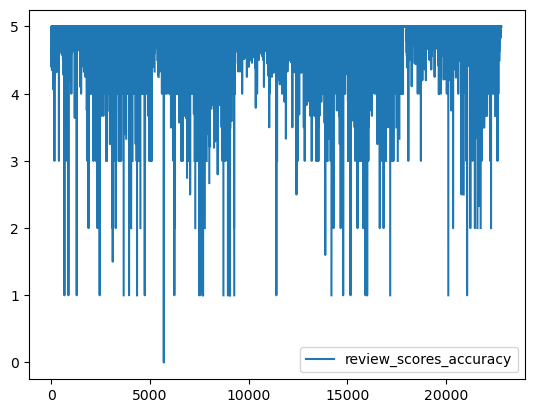

In [12]:
# Choose 3-4 factors, plot each against overall rating, see what most closely correlates
# not numeric "has_availability" "instant_bookable"
# Idea I should bucket these (percent ratings 1 through percent rating 5) etc oh oh
#  better idea box and wisker because those look fun 

var_int_df[[
# "review_scores_rating", 
# "availability_30", 
# "availability_60", 
# "availability_90", 
# "availability_365", 
# "number_of_reviews" ,
# "number_of_reviews_ltm" ,
# "number_of_reviews_l30d", 
"review_scores_accuracy" 
# "review_scores_cleanliness", 
# "review_scores_checkin", 
# "review_scores_communication", 
# "review_scores_location", 
# "review_scores_value", 
]].plot()

# so basically all of the review scores are highly correlated 

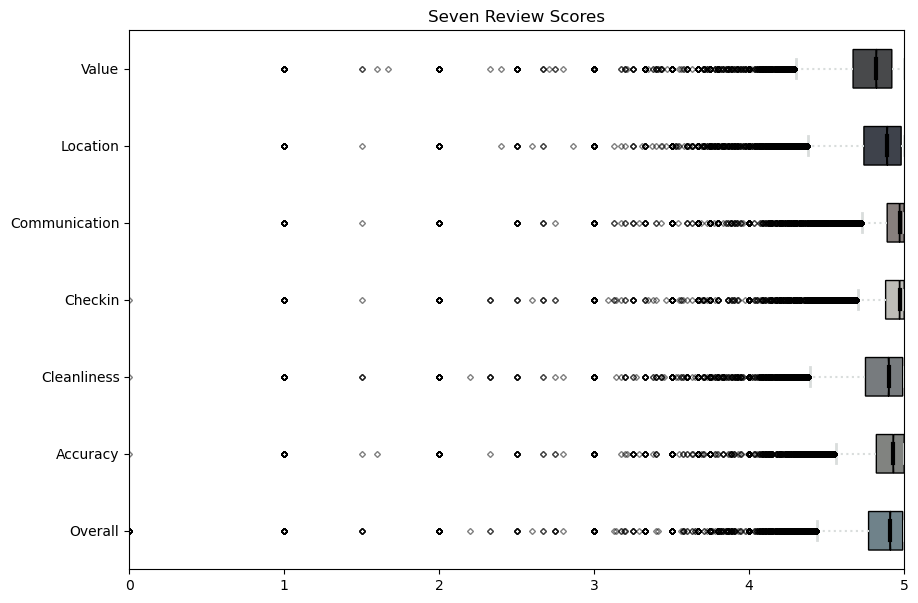

In [13]:
# I founds some cool code from: https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/
# Creating dataset
# my dataframe is: var_int_df

columns_to_plot = [
    "review_scores_rating",
    "review_scores_accuracy",
    "review_scores_cleanliness",
    "review_scores_checkin",
    "review_scores_communication",
    "review_scores_location",
    "review_scores_value"
]

# drops all values that we don't care about and creates a new group named data
data = [var_int_df[column].dropna().values for column in columns_to_plot] 

fig, ax = plt.subplots(figsize=(10, 7))

bp = ax.boxplot(data, patch_artist=True, notch=True, vert=0)

# Set x-axis limits between 0 and 5
ax.set_xlim(0, 5)

# these are HEX colors you can look up online 
colors = ['#6f828a', '#818380', '#777b7e', '#bebdb8', '#877f7d', '#3e424b', '#48494b'] 

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

for whisker in bp['whiskers']:
    whisker.set(color='#d9dddc', linewidth=1.5, linestyle=':')

for cap in bp['caps']:
    cap.set(color='#d9dddc', linewidth=2)

for median in bp['medians']:
    median.set(color='black', linewidth=3)

for flier in bp['fliers']:
    flier.set(marker='D', color='#d9dddc', alpha=0.5, markersize = 3)

ax.set_yticklabels(["Overall", "Accuracy", "Cleanliness", "Checkin", "Communication", "Location", "Value"])

plt.title("Seven Review Scores")
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

plt.show()



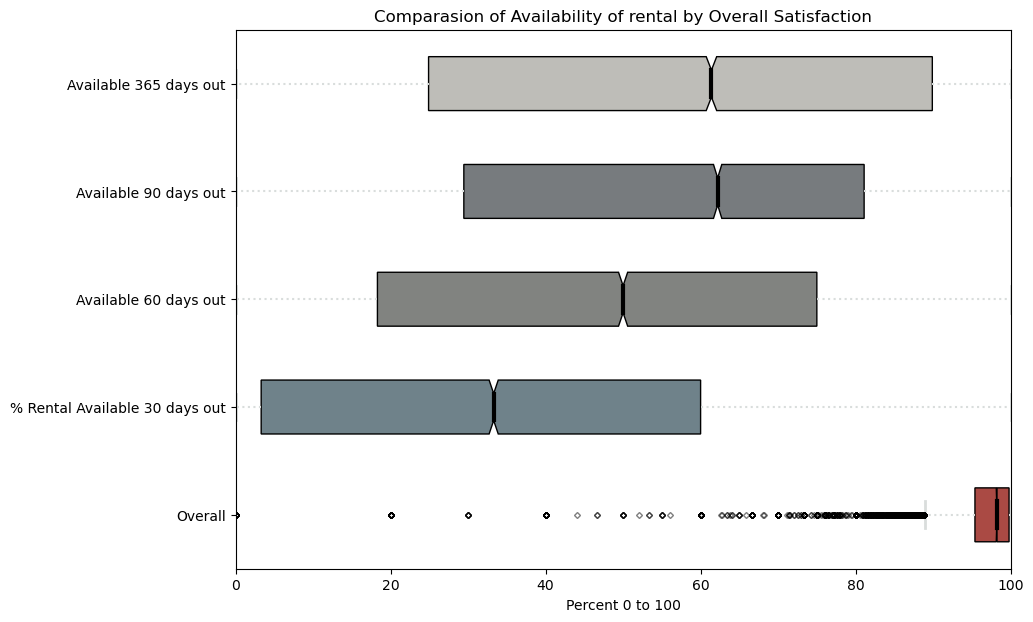

<Figure size 1000x700 with 0 Axes>

In [14]:
# looking at reviews and overall sat this will be included in the slide deck 

columns_to_plot = [
    "overall_rating_percent",
    "avail_30_percent",
    "avail_60_percent",
    "avail_90_percent",
    "avail_365_percent"
]

# drops all values that we don't care about and creates a new group named data
data = [var_int_df[column].dropna().values for column in columns_to_plot] 

fig, ax = plt.subplots(figsize=(10, 7))

bp = ax.boxplot(data, patch_artist=True, notch=True, vert=0)

# Set x-axis limits between 0 and 100
ax.set_xlim(0, 100)

# these are HEX colors you can look up online 
colors = ['#AA4A44','#6f828a', '#818380', '#777b7e', '#bebdb8'] 

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

for whisker in bp['whiskers']:
    whisker.set(color='#d9dddc', linewidth=1.5, linestyle=':')

for cap in bp['caps']:
    cap.set(color='#d9dddc', linewidth=2)

for median in bp['medians']:
    median.set(color='black', linewidth=3)

for flier in bp['fliers']:
    flier.set(marker='D', color='#d9dddc', alpha=0.5, markersize = 3)

ax.set_yticklabels(["Overall", "% Rental Available 30 days out", 
    "Available 60 days out", "Available 90 days out", "Available 365 days out"])

plt.title("Comparasion of Availability of rental by Overall Satisfaction")
ax.set_xlabel("Percent 0 to 100")
ax.get_yaxis().tick_left()

fig_hist = plt.figure(figsize=(10, 7))
# Save the figure as a PNG file
fig_hist.savefig("Histo_avail.png")

plt.show()


In [15]:
# Making a small df just to look at correlations 
# "overall_rating_percent", "accuracy_rating_percent", "cleanliness_rating_percent", "checkin_rating_percent" , "communication_rating_percent", 
# "location_rating_percent" , "value_rating_percent"

var_cor = ["review_scores_rating", "price", "availability_30", "availability_60", 
"availability_90", "availability_365", "number_of_reviews", "number_of_reviews_ltm", 
"number_of_reviews_l30d", "review_scores_rating", "review_scores_accuracy", 
"review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", 
"review_scores_location", "review_scores_value", "calculated_host_listings_count", 
"reviews_per_month", "has_availability_recode" , "instant_bookable_recode"]

var_cor_df = df[var_cor]
var_cor_df.head()

,review_scores_rating,price,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,has_availability_recode,instant_bookable_recode
0,4.99,90.0,4,27,57,147,179,7,0,4.99,4.99,4.96,5.00,5.00,5.00,4.91,2,2.87,1.0,2.0
1,4.85,179.0,23,53,83,358,87,0,0,4.85,4.78,4.81,4.95,4.96,4.65,4.71,1,0.50,1.0,2.0
2,4.85,64.0,5,27,53,233,712,43,2,4.85,4.78,4.58,4.93,4.95,4.76,4.85,2,4.04,1.0,2.0
3,4.87,57.0,0,0,0,158,168,1,0,4.87,4.75,4.55,4.94,4.94,4.81,4.86,2,0.95,1.0,2.0
4,4.76,33.0,0,0,13,288,256,0,0,4.76,4.75,4.80,4.86,4.91,4.87,4.81,2,1.39,1.0,2.0


In [16]:
# Taking out the uncorrelated variables to reduce the number of variables keeping price
# Thinking about renaming the variables to something more useful


var_cor_2_names = [
    "overall_rating_percent", 
    "accuracy_rating_percent" ,
    "value_rating_percent", 
    "communication_rating_percent",
    "cleanliness_rating_percent", 
    "checkin_rating_percent", 
    "location_rating_percent", 
    "price",
    "avail_30_percent", 
    "avail_60_percent", 
    "avail_90_percent", 
    "avail_365_percent"
]

# Naming it silly because I worked way to long at this to get it to work and 
# I was being silly
var_cor_small_df_silly = df[var_cor_2_names]
# var_cor_small_df


var_cor_small_df = var_cor_small_df_silly.rename(columns={
    'overall_rating_percent': 'Overall Satisfaction: Survey', 
    'accuracy_rating_percent': 'Accuracy of Listing: Survey',
    'cleanliness_rating_percent': 'Cleanliness of Listing: Survey',
    'checkin_rating_percent': 'Checkin Process: Survey',
    'communication_rating_percent': 'Communication about Listing: Survey',
    'location_rating_percent': 'Location of Listing: Survey',
    'value_rating_percent': 'Value for Money: Survey',
    'price': 'Price',      
    'avail_30_percent': 'Percent Listing Available 30 days out', 
    'avail_60_percent': 'Percent Listing Available 60 days out',
    'avail_90_percent': 'Percent Listing Available 90 days out', 
    'avail_365_percent': 'Percent Listing Available 365 days out'
    })

var_cor_small_df


,Overall Satisfaction: Survey,Accuracy of Listing: Survey,Value for Money: Survey,Communication about Listing: Survey,Cleanliness of Listing: Survey,Checkin Process: Survey,Location of Listing: Survey,Price,Percent Listing Available 30 days out,Percent Listing Available 60 days out,Percent Listing Available 90 days out,Percent Listing Available 365 days out
0,99.8,99.8,98.2,100.0,99.2,100.0,100.0,90.0,13.3,45.0,63.3,40.3
1,97.0,95.6,94.2,99.2,96.2,99.0,93.0,179.0,76.7,88.3,92.2,98.1
2,97.0,95.6,97.0,99.0,91.6,98.6,95.2,64.0,16.7,45.0,58.9,63.8
3,97.4,95.0,97.2,98.8,91.0,98.8,96.2,57.0,0.0,0.0,0.0,43.3
4,95.2,95.0,96.2,98.2,96.0,97.2,97.4,33.0,0.0,0.0,14.4,78.9
...,...,...,...,...,...,...,...,...,...,...,...,...
22846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.0,100.0,100.0,100.0,100.0
22847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,6.7,3.3,2.2,0.5
22848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165.0,53.3,76.7,84.4,70.1
22849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,195.0,96.7,98.3,98.9,73.7


In [17]:

# I was thinking it would be good to have the p-values to see what is significant 
# ChatGBT helped with the error that I was getting by including this cleaning code 
# this drops all missing to create a new df that is "clean"
var_cor_df_cleaned = var_cor_small_df.replace([np.inf, -np.inf], np.nan).dropna()

# Calculate the correlation matrix and p-values
correlation_matrix = var_cor_df_cleaned.corr()
p_values = pd.DataFrame(index=correlation_matrix.index, columns=correlation_matrix.columns)

for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.index:
        # Perform Pearson correlation test
        corr, p_value = stats.pearsonr(var_cor_df_cleaned[col1], var_cor_df_cleaned[col2])
        
        # Store p-value in the matrix
        p_values.at[col1, col2] = p_value

# Combine correlation matrix and p-values matrix since they are two seperate sets
correlation_matrix_with_pvalues = pd.concat([correlation_matrix, p_values], keys=['Correlation', 'P-Value'])

# Print the combined matrix
print(correlation_matrix_with_pvalues.round(2))

#I still don't like the way this looks it is large and messy - just added a new list

                                                   Overall Satisfaction: Survey  \
Correlation Overall Satisfaction: Survey                                    1.0   
            Accuracy of Listing: Survey                                0.842363   
            Value for Money: Survey                                    0.844092   
            Communication about Listing: Survey                        0.766812   
            Cleanliness of Listing: Survey                             0.744825   
            Checkin Process: Survey                                    0.680689   
            Location of Listing: Survey                                0.582999   
            Price                                                      0.010152   
            Percent Listing Available 30 days out                     -0.084591   
            Percent Listing Available 60 days out                      -0.06245   
            Percent Listing Available 90 days out                     -0.044801   
    

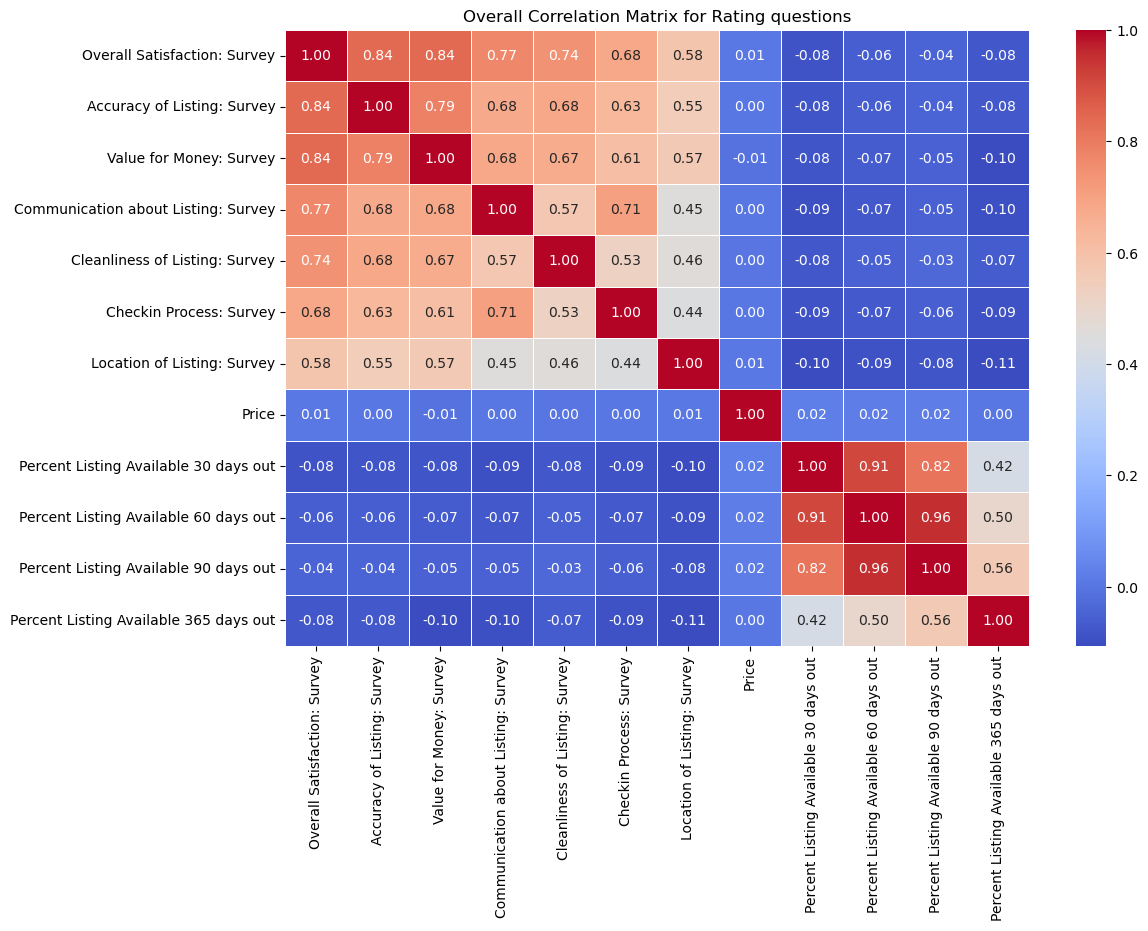

In [18]:
# n0w we are messing with heatmaps 
# this is just printing out the cleaned correlation matrix I build above 
correlation_matrix = var_cor_df_cleaned.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Overall Correlation Matrix for Rating questions')
plt.show()

# since I have variables that are basically the same there are pockets that
# are reading false poistives I should clean my correlation df (ie availability_30 and avail_30_percent)

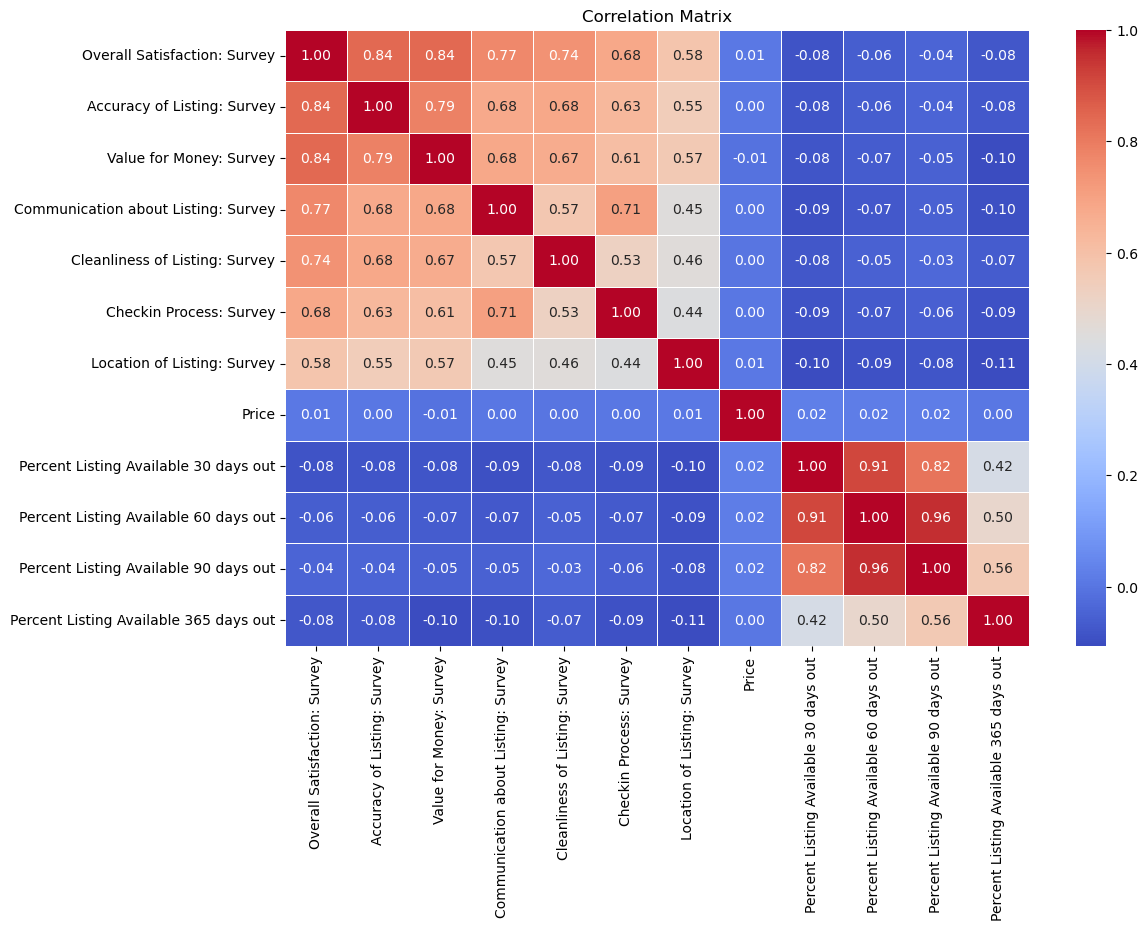

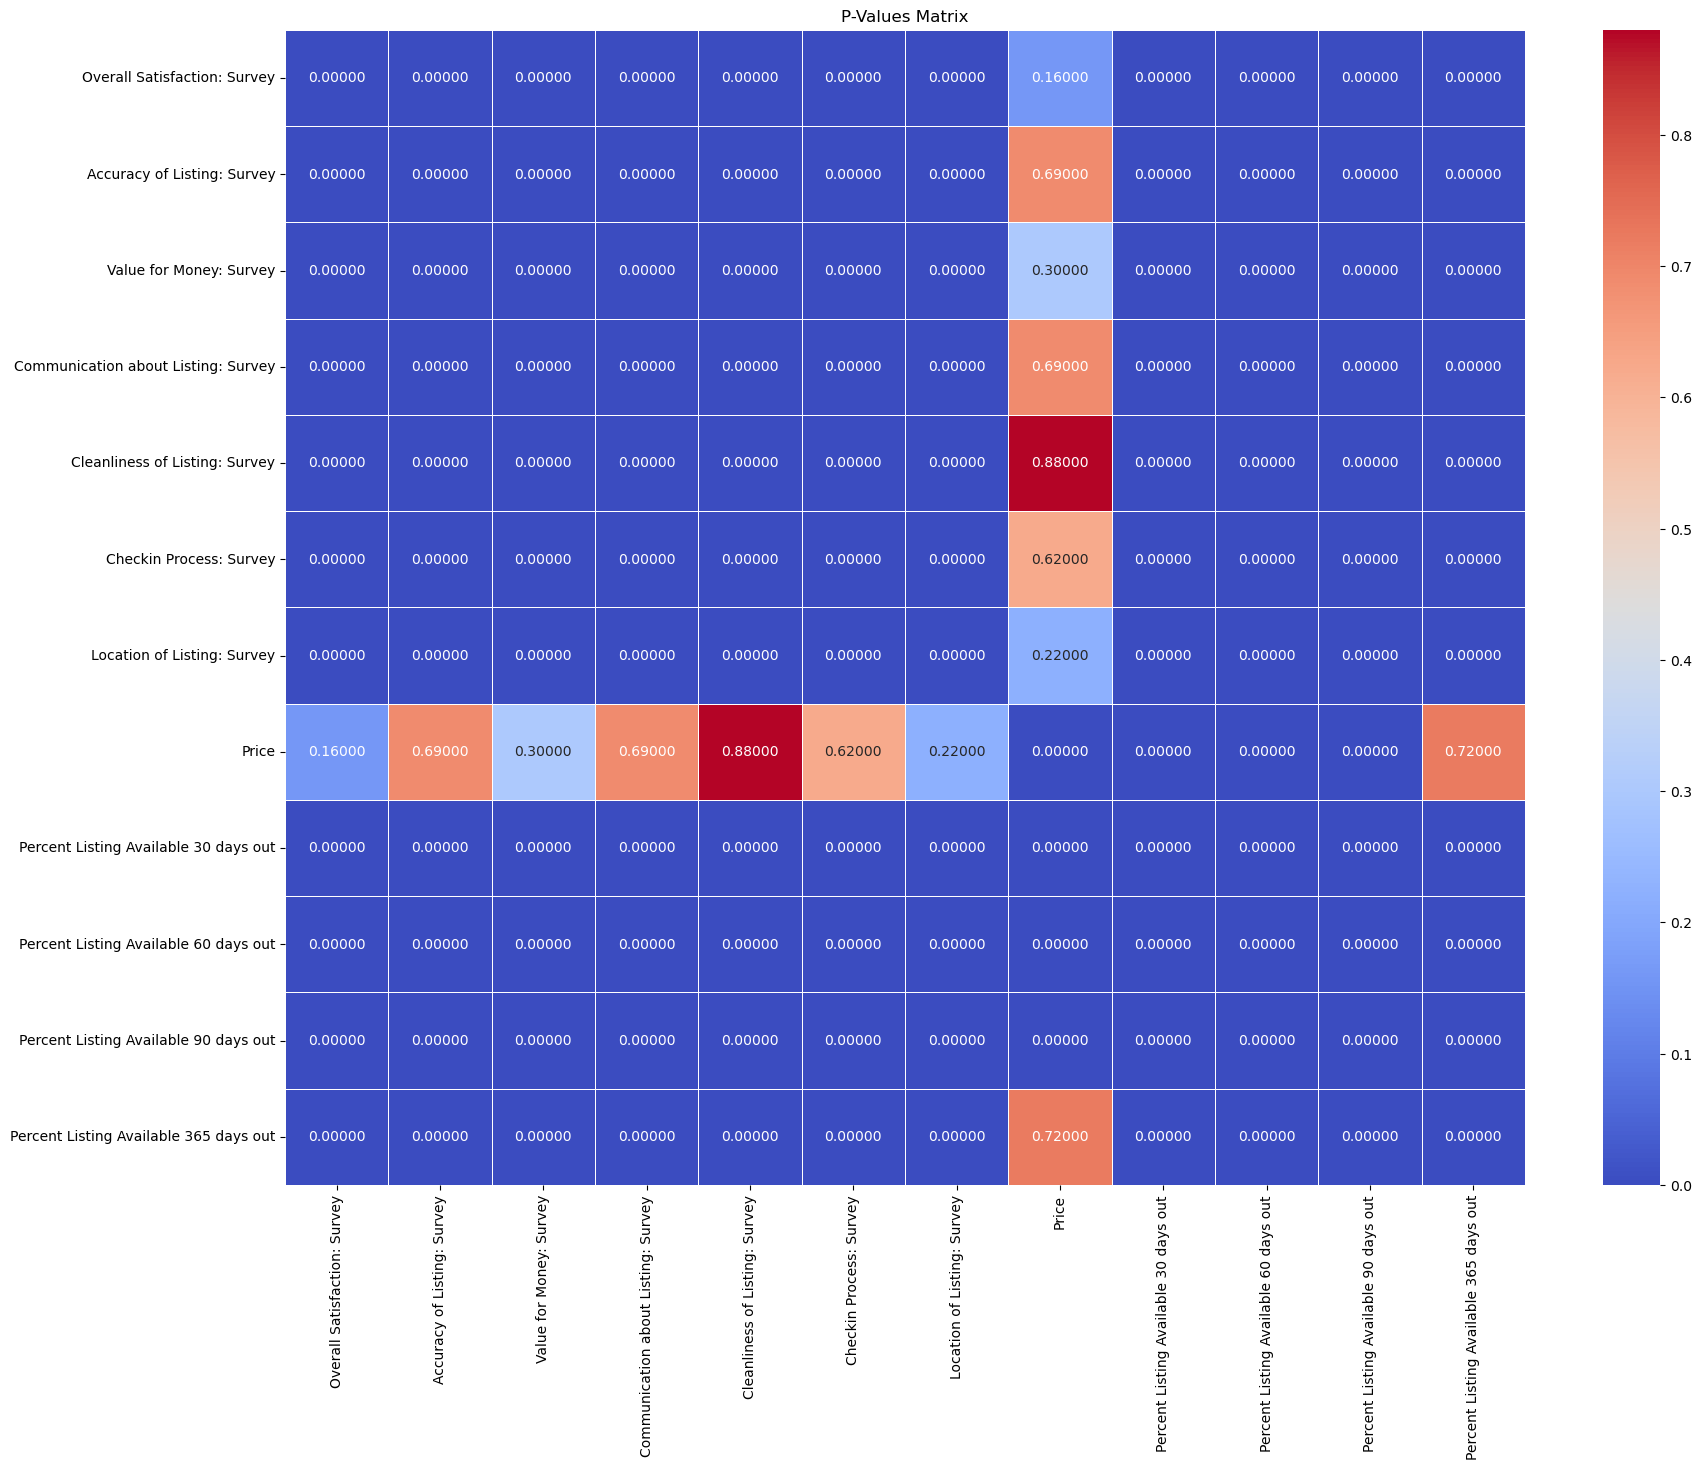

In [19]:
# https://www.statology.org/p-value-correlation-pandas/
# chatgbt helped with the functions because I could not get it to work
# Create a function to calculate correlation matrix with p-values
# I am using the p-value to help interpret the data but not as a graph

def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(stats.pearsonr(df[r], df[c])[1], 2)
    
    # Convert p-values to numeric, replacing non-numeric values with NaN
    pvalues = round(pvalues.apply(pd.to_numeric, errors='coerce'), 2)
    
    return pvalues

# Assuming var_cor_df_cleaned is your DataFrame
correlation_matrix = var_cor_df_cleaned.corr()
p_values = calculate_pvalues(var_cor_df_cleaned)

# Create a heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')

# Display p-values next to the correlation matrix
# things to note: fmt=".5f" - this is saying place 5 decimal places
plt.figure(figsize=(20, 15))
sns.heatmap(p_values, annot=True, cmap='coolwarm', fmt=".5f", linewidths=.5)
plt.title('P-Values Matrix')

plt.show()